In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sn

# Reading the Dataset :

In [2]:
d1 = pd.read_csv('uber data analysis.csv')

In [3]:
d1

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [4]:
d1.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [5]:
d1.shape

(1155, 7)

# Checking the null values

In [6]:
d1.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1150,False,False,False,False,False,False,False
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False


In [7]:
d1.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [8]:
d1['PURPOSE*'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [9]:
d1['PURPOSE*'].describe()

count         653
unique         10
top       Meeting
freq          187
Name: PURPOSE*, dtype: object

In [10]:
d1['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

In [11]:
d1['CATEGORY*'].describe()

count         1155
unique           2
top       Business
freq          1078
Name: CATEGORY*, dtype: object

## Finding the duplicate values & removing them

In [12]:
d1[d1.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [13]:
d1.drop_duplicates(inplace=True)

In [14]:
d1.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

### There we have 4 rows having starting and end-time exactly equal i.e. zero trip time, while having non-zero miles (distance) - which cannot be possible.

In [15]:
d1[d1['START_DATE*'] == d1['END_DATE*']]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
751,09-06-2016 17:49,09-06-2016 17:49,Business,Unknown Location,Unknown Location,69.1,NaN
761,9/16/2016 7:08,9/16/2016 7:08,Business,Unknown Location,Unknown Location,1.6,NaN
798,10-08-2016 15:03,10-08-2016 15:03,Business,Karachi,Karachi,3.6,NaN
807,10/13/2016 13:02,10/13/2016 13:02,Business,Islamabad,Islamabad,0.7,NaN


In [16]:
d1.drop(d1.index[[751,761,798,807]], inplace = True)

In [17]:
d1.shape

(1150, 7)

### Converting 'START_DATE' and 'END_DATE' to Datetime format

In [18]:
d1['START_DATE*'] = pd.to_datetime(d1['START_DATE*'])
d1['END_DATE*'] = pd.to_datetime(d1['END_DATE*'])

In [19]:
d1.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Plotting Business vs Personal Trips

c:\Users\jyoshna.sarva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


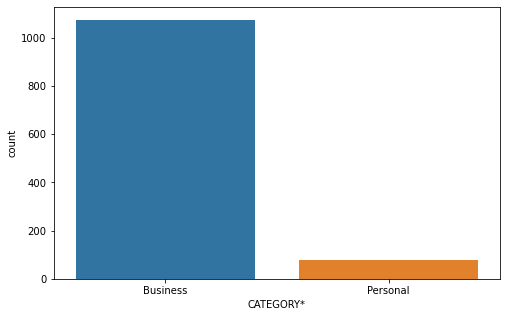

In [20]:
mp.figure(figsize=(8,5))
sn.countplot(d1['CATEGORY*'])
mp.show()

## Plotting the Frequency for the Purpose of Trip

c:\Users\jyoshna.sarva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


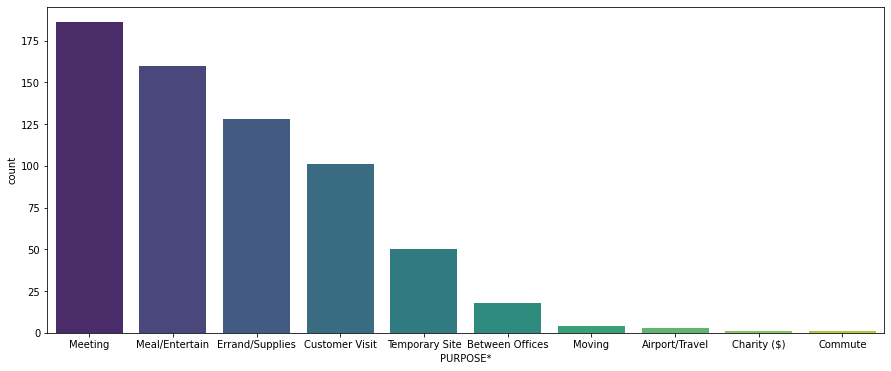

In [21]:
mp.figure(figsize=(15,6))
sn.countplot(d1['PURPOSE*'], order=d1['PURPOSE*'].value_counts().index, palette='viridis')
mp.show()

## Checking how many are the ROUND TRIPS i.e. start and stop points are same

c:\Users\jyoshna.sarva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


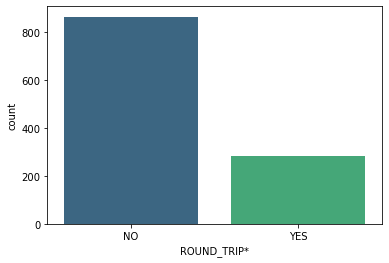

In [22]:
def round(x):
    if x['START*'] == x['STOP*']:
        return 'YES'
    else:
        return 'NO'
    
d1['ROUND_TRIP*'] = d1.apply(round, axis=1)

sn.countplot(d1['ROUND_TRIP*'], order=d1['ROUND_TRIP*'].value_counts().index, palette='viridis')
mp.show()

In [23]:
#There are lesser number of round trips

## Entering Month Name and evaluating Frequency of Trip in each Month

In [24]:
d1['MONTH*'] = pd.DatetimeIndex(d1['START_DATE*']).month

In [25]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

d1['MONTH*'] = d1['MONTH*'].map(dic)

c:\Users\jyoshna.sarva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


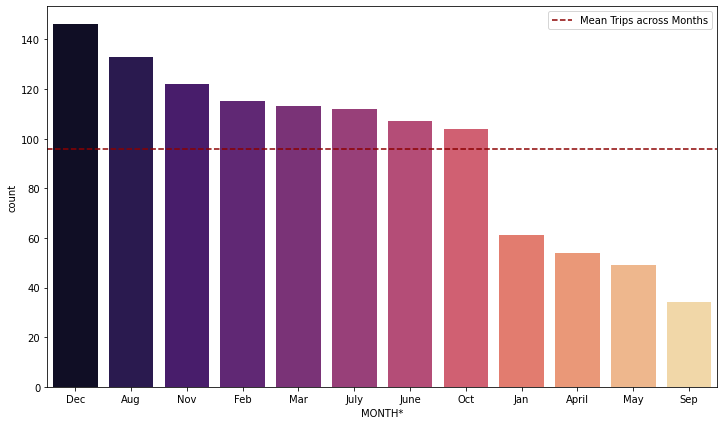

In [26]:
mp.figure(figsize=(12,7))
sn.countplot(d1['MONTH*'], order=d1['MONTH*'].value_counts().index, palette='magma')
mp.axhline(d1['MONTH*'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
mp.legend()
mp.show()

In [27]:
#Above plot shows that December has highest number of trips

## Round Trip against Months

c:\Users\jyoshna.sarva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


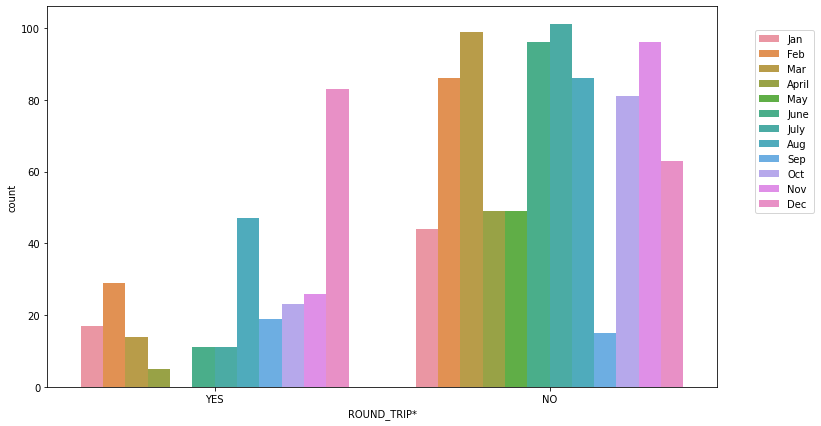

In [28]:
mp.figure(figsize=(12,7))
a=sn.countplot(d1['ROUND_TRIP*'],hue=d1['MONTH*'])
mp.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
mp.show()

## Mean distance of Trip w.r.t Category

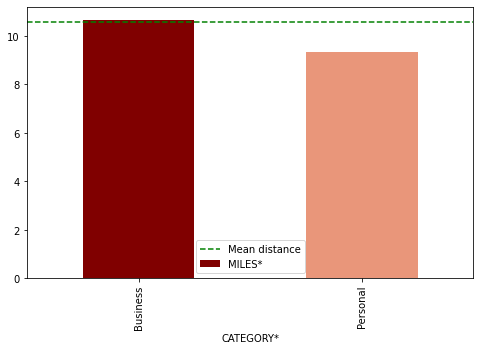

In [29]:
mp.figure(figsize=(8,5))
d1.groupby('CATEGORY*')['MILES*'].mean().plot.bar(color=['maroon','darksalmon'])
mp.axhline(d1['MILES*'].mean(), linestyle='--', color='green', label='Mean distance')
mp.legend()
mp.show()

In [30]:
#Now we need to know which number of hours has highest trips

c:\Users\jyoshna.sarva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


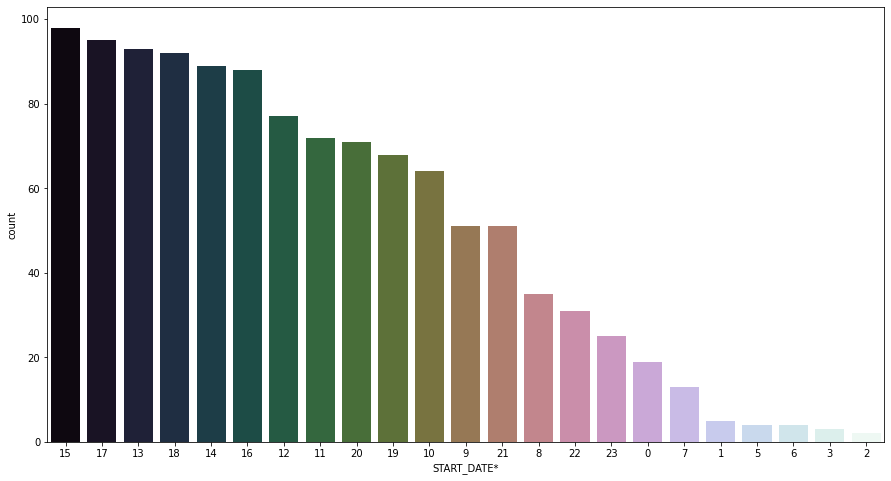

In [31]:
mp.figure(figsize=(15,8))
sn.countplot(d1['START_DATE*'].dt.hour, palette='cubehelix',
              order = d1['START_DATE*'].dt.hour.value_counts().index)
mp.show()

In [32]:
#From above graph it is found that higest number of trips occur between 12p.m - 3p.m, among which 3pm has highest trips

## Category wise trip per day

In [33]:
def day(x):
    day = x['START_DATE*'].day_name()
    return day

d1['DAY*'] = d1.apply(day, axis=1)

c:\Users\jyoshna.sarva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


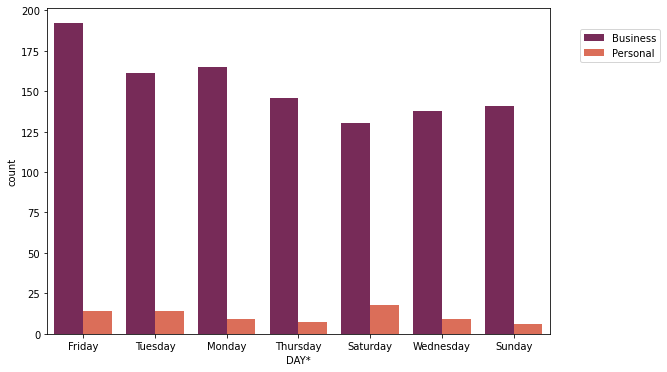

In [34]:
mp.figure(figsize=(9,6))
a=sn.countplot(d1['DAY*'],hue=d1['CATEGORY*'], palette='rocket',
                order=d1['DAY*'].value_counts().index)
mp.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
mp.show()